# Credit Card Fraud Detection using Various ML Classification

## Data Exploration

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

import os
import shutil
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

np.random.seed(2)

2022-07-12 14:09:36.424477: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-07-12 14:09:36.427616: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-12 14:09:36.427627: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### Load Data

Find dataset at https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [2]:
dataset = pd.read_csv('dataset.csv')
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Data Visualization 

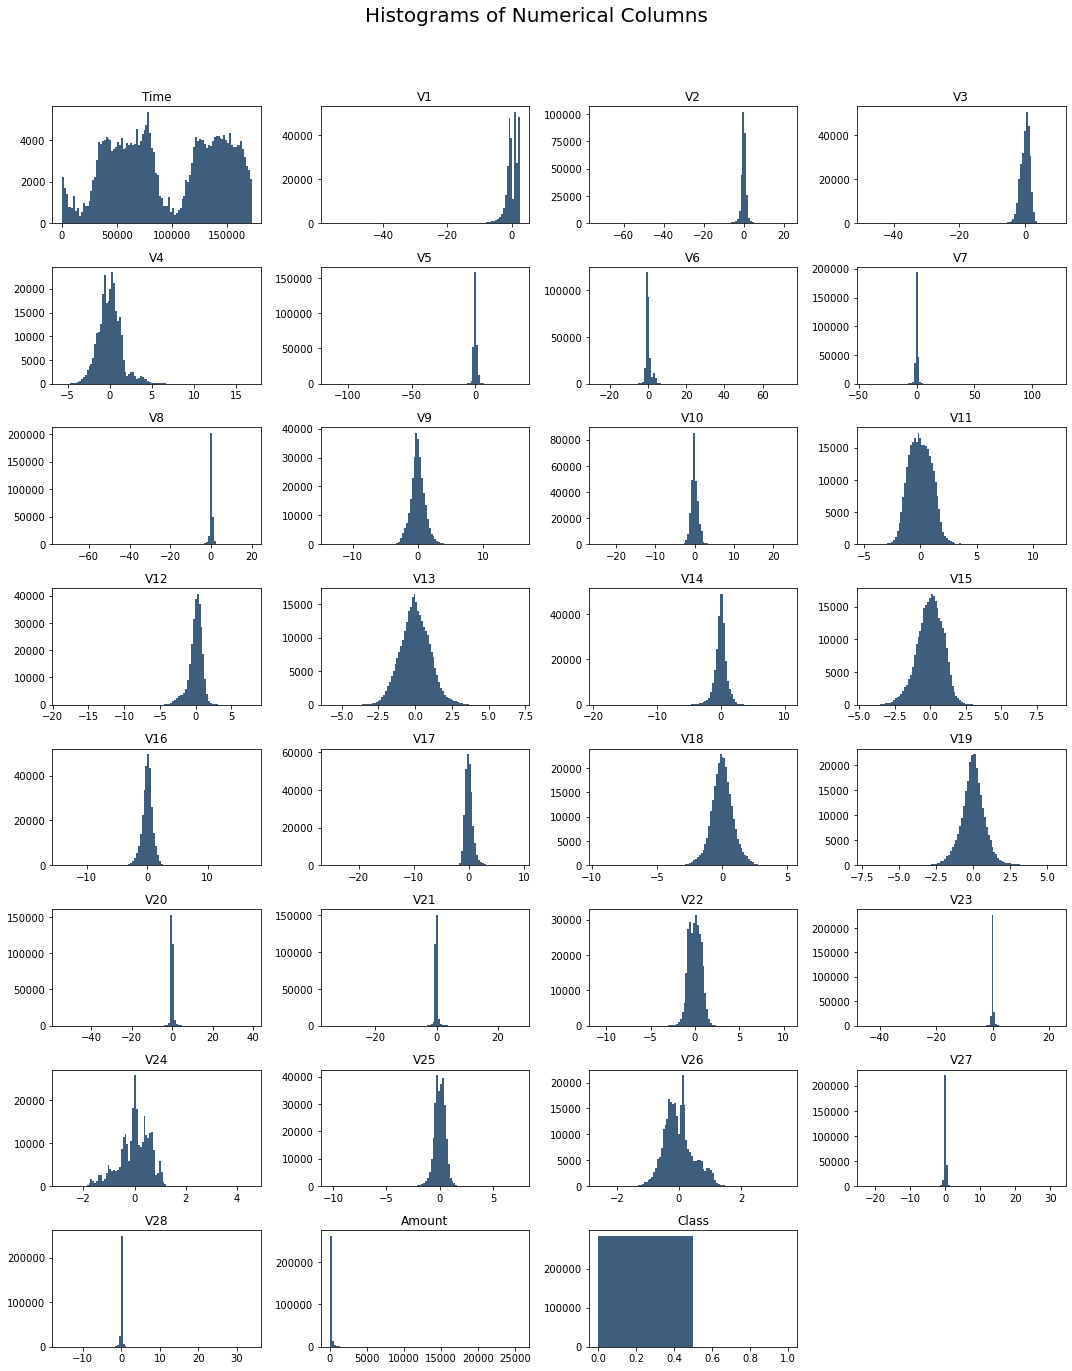

In [3]:
## Histograms
fig = plt.figure(figsize=(15, 20))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(dataset.shape[1]):
    plt.subplot(8, 4, i + 1)
    f = plt.gca()
    f.set_title(dataset.columns.values[i])

    vals = np.size(dataset.iloc[:, i].unique())
    if vals >= 100:
        vals = 100                                    # limit our bins to 100 maximum
    
    plt.hist(dataset.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [4]:
print('Number of fraudulent transactions = %d or %d per 100,000 transactions in the dataset'
      %(len(dataset[dataset.Class==1]), len(dataset[dataset.Class==1])/len(dataset)*100000))

Number of fraudulent transactions = 492 or 172 per 100,000 transactions in the dataset


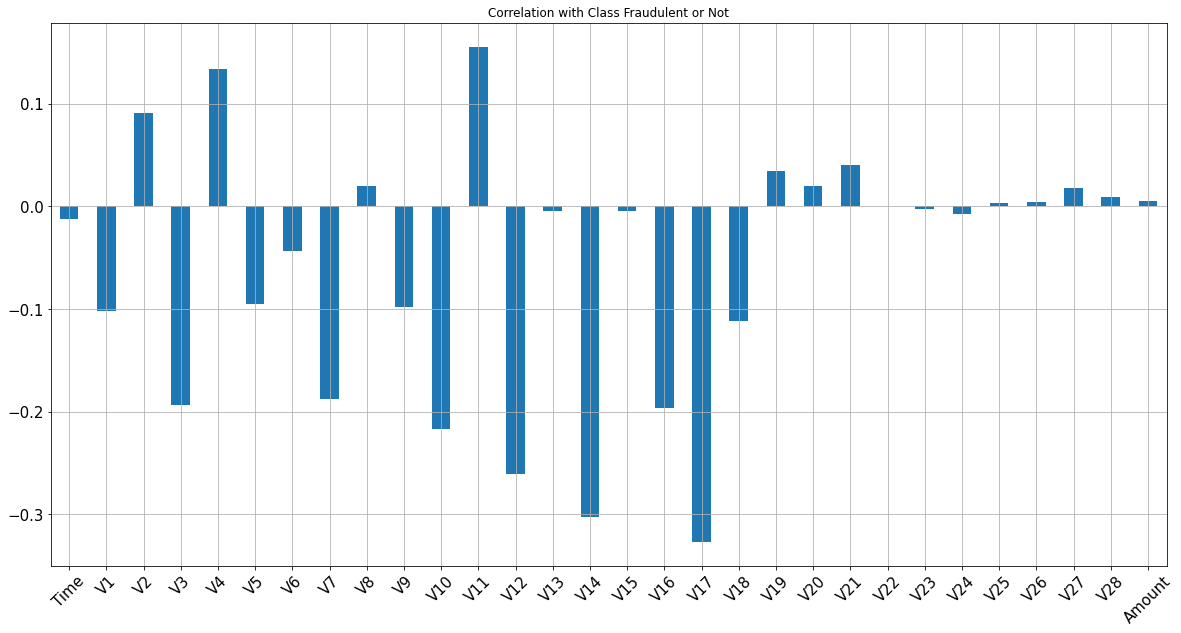

In [5]:
## Linear Correlation with Response Variable (Note: Models like RandomForest are not linear)
data2 = dataset.drop(columns = ['Class'])   # drop non numerical columns
data2.corrwith(dataset.Class).plot.bar(
        figsize = (20, 10), title = "Correlation with Class Fraudulent or Not", fontsize = 15,
        rot = 45, grid = True)
plt.show()

### Separate feature data (predictors) from labels

In [6]:
model_features = dataset.iloc[:,1:30].columns

In [7]:
print(model_features)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(dataset[model_features], dataset["Class"].to_numpy())

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.15)
y_train = np.reshape(y_train, (len(y_train),1))
y_test = np.reshape(y_test, (len(y_test),1))

In [10]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(483335, 29)
(85295, 29)
(483335, 1)
(85295, 1)


## Deep Learning

In [11]:
def create_model():
  model = tf.keras.Sequential([
      # This is the first layer
      tf.keras.layers.Dense(14, input_shape=(29,), activation='relu'),
      tf.keras.layers.Dense(7, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
      ])
  
  adam = tf.keras.optimizers.Adam(learning_rate=0.0001)

  model.compile(
        loss = 'binary_crossentropy', 
        optimizer = adam, 
        metrics = ['accuracy'])
  return model

model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                420       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 533
Trainable params: 533
Non-trainable params: 0
_________________________________________________________________


2022-07-12 14:09:54.063842: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-07-12 14:09:54.063891: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 14:09:54.063924: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (pritish): /proc/driver/nvidia/version does not exist
2022-07-12 14:09:54.064984: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.fit(x = x_train, y = y_train, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

Epoch 1/10
15105/15105 [==============================] - 13s 843us/step - loss: 0.2170 - accuracy: 0.9243 - val_loss: 0.0990 - val_accuracy: 0.9531
Epoch 2/10
15105/15105 [==============================] - 12s 811us/step - loss: 0.0873 - accuracy: 0.9601 - val_loss: 0.0737 - val_accuracy: 0.9649
Epoch 3/10
15105/15105 [==============================] - 13s 848us/step - loss: 0.0668 - accuracy: 0.9717 - val_loss: 0.0623 - val_accuracy: 0.9749
Epoch 4/10
15105/15105 [==============================] - 15s 1ms/step - loss: 0.0542 - accuracy: 0.9796 - val_loss: 0.0471 - val_accuracy: 0.9835
Epoch 5/10
15105/15105 [==============================] - 15s 1ms/step - loss: 0.0457 - accuracy: 0.9831 - val_loss: 0.0423 - val_accuracy: 0.9829
Epoch 6/10
15105/15105 [==============================] - 15s 1ms/step - loss: 0.0397 - accuracy: 0.9878 - val_loss: 0.0539 - val_accuracy: 0.9811
Epoch 7/10
15105/15105 [==============================] - 15s 1ms/step - loss: 0.0359 - accuracy: 0.9894 - val_l

In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
probabilities = model.predict(x = x_test)
print(probabilities)

2666/2666 [==============================] - 1s 420us/step
[[9.9991167e-01]
 [1.4919682e-06]
 [9.9999934e-01]
 ...
 [9.9999827e-01]
 [9.6757519e-11]
 [9.1811913e-08]]


Confusion matrix, without normalization
[[41939   542]
 [    0 42814]]


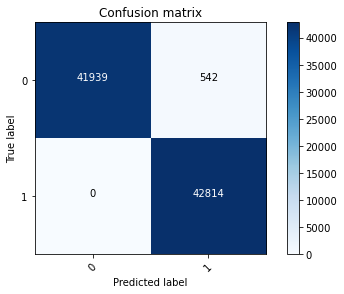

In [15]:
from sklearn.metrics import confusion_matrix
import itertools
cnf_matrix = confusion_matrix(y_test, (probabilities>0.5).astype(int))
plot_confusion_matrix(cnf_matrix, classes = range(2))
plt.show()